# MAPPO Evaluation & Rendering

This runs the trained MAPPO policy with the patrolling zoo.

In [1]:
%reload_ext autoreload
%autoreload 2
from onpolicy.scripts.render.render_patrolling import get_config, parse_args, main

import os
import yaml
os.environ["WANDB__SERVICE_WAIT"] = "300"

## Configuration

In [2]:
# Set the run directory.
# model_dir = "/home/gyaan/data/sdzoo/onpolicy/scripts/results/search-deliver/9nodes/mappo/search-and-deliver-9nodes-single-agent/wandb/run-20240503_153719-gx5hrkxf/files"
model_dir = "/home/gyaan/data/sdzoo/onpolicy/scripts/results/search-deliver/9nodes/mappo/search-and-deliver-more-alpha/wandb/run-20240503_182557-mihlpgca/files"

In [3]:
# Load the default arguments.
parser = get_config()
all_args = parse_args([], parser)

# Load new arguments from the config file.
config_file = os.path.join(model_dir, "config.yaml")
args = yaml.load(open(config_file), Loader=yaml.FullLoader)

# Convert the arguments to a Namespace object.
for a in args:
    if type(args[a]) == dict and "value" in args[a]:
        args[a] = args[a]["value"]
for a in args:
    setattr(all_args, a, args[a])

# Set required render-specific arguments. Do not change these!
all_args.use_wandb = False
all_args.use_render = True
all_args.model_dir = model_dir
all_args.cuda = False

In [4]:
# Feel free to change these arguments.
all_args.render_episodes = 1
# all_args.episode_length = 2
# all_args.max_cycles = all_args.episode_length

all_args.skip_steps_sync = False
all_args.agent_speed = 10.0
all_args.num_agents = 1
all_args.observation_radius = 9999999
# all_args.graph_random = True
# all_args.graph_random_nodes = 42

# all_args.attrition_method = "fixed_time"
# all_args.attrition_fixed_times = [300, 1100]

all_args.graph_name = "9nodes"
all_args.graph_file = f"../../../sdzoo/env/{all_args.graph_name}.graph"

## Perform Rendering

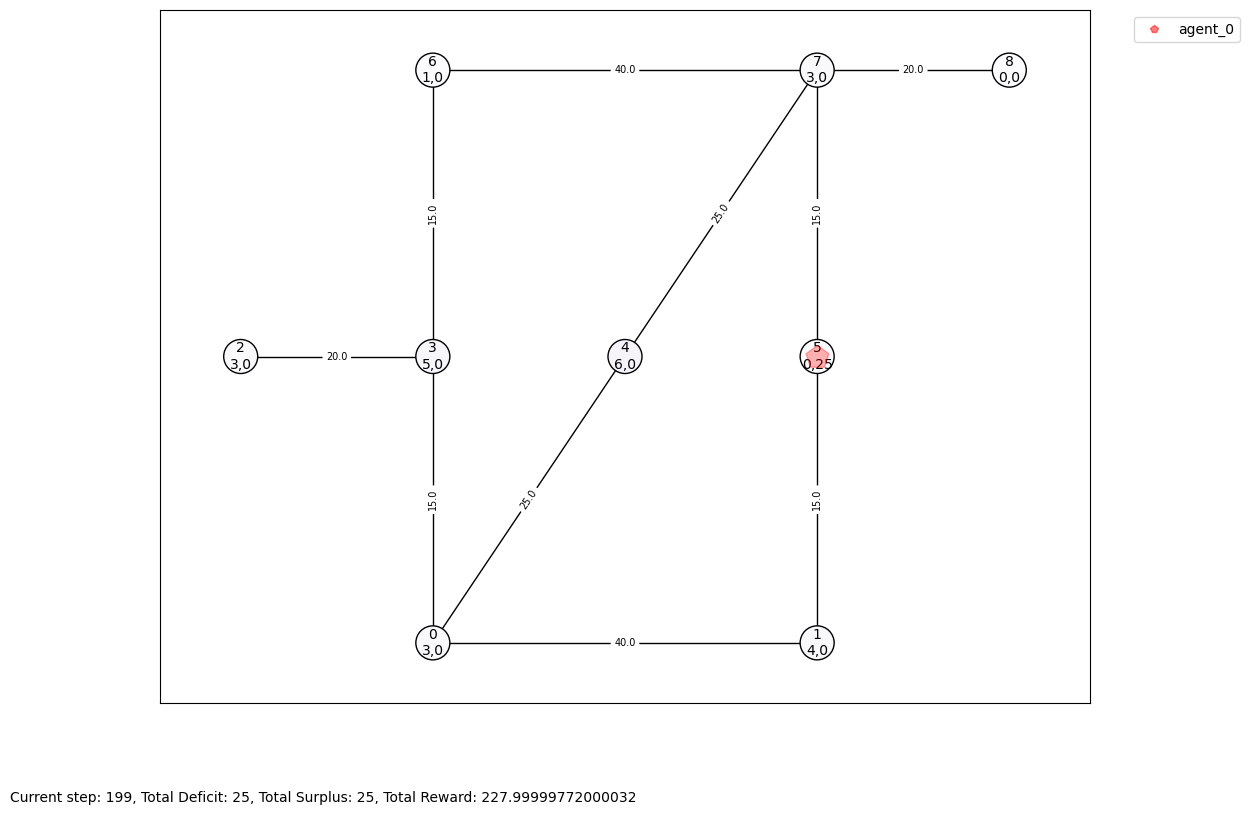

Total Deficit: 25
Total Surplus: 24
AGENT ID: 0
Agent 0 Payloads: 1
Agent 0 Max Capacity: 1


In [5]:
main([], parsed_args = all_args)